In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PCA import classify_sym, type_to_color
%matplotlib inline

Running on the CPU


In [8]:
unitaries_prods = np.load("/Users/jonathanlu/Documents/symmetry-learning/data/4XY-PCA-unitaries.npy")
losses = np.load("/Users/jonathanlu/Documents/symmetry-learning/data/4XY-PCA-losses.npy")
# unitaries_prods = unitaries_prods[losses < 1e-3]
sym_labels = np.array([type_to_color(classify_sym(np.abs(unitary_prod))) \
                            for unitary_prod in unitaries_prods])
NRUN, NUM_QUBITS = unitaries_prods.shape[:2]
print(f"{NRUN} symmetries on a {NUM_QUBITS}-qubit state")

100 symmetries on a 4-qubit state


In [9]:
# Project from the Lie group to 2D space
unitary_vecs = StandardScaler().fit_transform(np.abs(unitaries_prods.reshape((NRUN, -1))))
pca = PCA(n_components=2)
fit = pca.fit_transform(unitary_vecs)
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio = {explained_variance}")

PCA explained variance ratio = [0.29034418 0.26015628]


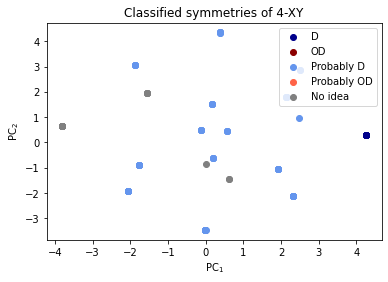

In [11]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
ax.set_title(f"Classified symmetries of {NUM_QUBITS}-XY")
ax.set_xlabel(r'PC$_1$')
ax.set_ylabel(r'PC$_2$')
# ax.set_zlabel(r'PC$_3$')
clab = [('darkblue', 'D'), ('darkred', 'OD'), \
        ('cornflowerblue', 'Probably D'), ('tomato', 'Probably OD'), \
        ('gray', 'No idea')]
for color, label in clab:
    idxs = np.where(sym_labels == color)
    plt.scatter(fit[idxs,0], fit[idxs,1], c=color, label=label)
plt.legend()
# plt.savefig("/Users/jonathanlu/Documents/symmetry-learning/Figures/pca.png")
plt.show()